In [8]:
from scipy.integrate import odeint 
from scipy import array
import matplotlib.pyplot as plt
from numpy import *

#Definimos el sistema de ecuaciones de VanDerPol, donde x es la posicion, y es la primera derivada de x
#y dx_y es la derivada de y/segunda derivada de x
def vectorfield(X,t=0):
    x = X[0]
    y = X[1]
    dx = y
    dx_y = b*(1 - x**2)*dx - x
    return array([dx, dx_y])

In [9]:
stoptime = 50
numpoints = 2500

#Creamos los valores del tiempo a utilizar
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Condiciones iniciales
x0 = 1.0
v0 = 2.0

#Coeficiente de amortiguamiento
b = 3

#Resolvemos el sistema de ecuaciones
x, y = odeint(vectorfield,(x0,v0),t).T

with open('VanDerPolcompelto.dat', 'w') as f:
    for t1, x1,y1 in zip(t, x, y):
        print (t1, x1,y1 ,file=f)

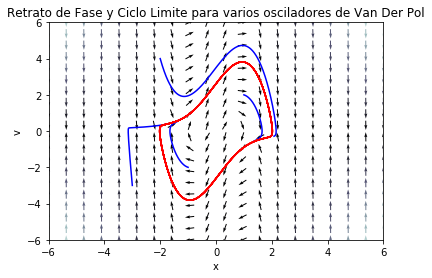

In [16]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import pylab as p
%matplotlib inline

nb_points   = 20

x = linspace(-6, 6, nb_points)
y = linspace(-6, 6, nb_points)

J1 , G1  = meshgrid(x, y)                      
DJ1, DG1 = vectorfield([J1, G1])                
M = (hypot(DJ1, DG1))                           
M[ M == 0] = 1.                               
DJ1 /= M                                        
DG1 /= M

Q = p.quiver(J1, G1, DJ1, DG1, M, pivot='mid', cmap=p.cm.bone)

t1, x1, y1 = loadtxt('VanDerPol33.dat', unpack=True)
t2, x2, y2 = loadtxt('VanDerPol24.dat', unpack=True)
t3, x3, y3 = loadtxt('VanDerPol12.dat', unpack=True)
t4, x4, y4 = loadtxt('VanDerPol12_p.dat', unpack=True)
t5, x5, y5 = loadtxt('VanDerPolcompleto.dat', unpack=True, skiprows=535)

figure(1, figsize=(6, 4.5))

xlabel('x')
ylabel('v')

lw=1.5

plot(x1, y1, 'blue', linewidth=lw)
plot(x2, y2, 'blue', linewidth=lw)
plot(x3, y3, 'blue', linewidth=lw)
plot(x4, y4, 'blue', linewidth=lw)
plot(x5, y5, 'red', linewidth=lw)

plt.xlim(-6,6)
plt.ylim(-6,6)

title('Retrato de Fase y Ciclo Limite para varios osciladores de Van Der Pol')
savefig('Im1.png', dpi=100)